C:\Users\ducan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ducan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ducan\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ducan\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ducan\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

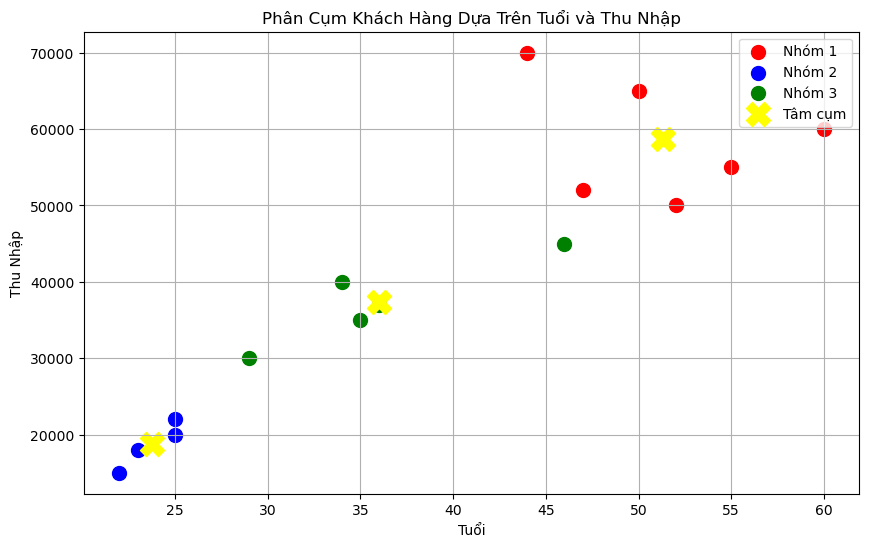

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Tạo dữ liệu mẫu
data = {
    'Tuổi': [22, 25, 47, 35, 46, 60, 29, 34, 50, 44, 23, 25, 36, 52, 55],
    'Thu Nhập': [15000, 20000, 52000, 35000, 45000, 60000, 30000, 40000, 65000, 70000, 18000, 22000, 37000, 50000, 55000]
}

# Chuyển đổi dữ liệu thành DataFrame
df = pd.DataFrame(data)

# Sử dụng thuật toán K-means với 3 cụm
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Nhóm'] = kmeans.fit_predict(df[['Tuổi', 'Thu Nhập']])

# Trực quan hóa kết quả
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']

# Vẽ các cụm
for i in range(k):
    cluster_data = df[df['Nhóm'] == i]
    plt.scatter(cluster_data['Tuổi'], cluster_data['Thu Nhập'], s=100, color=colors[i], label=f'Nhóm {i + 1}')

# Vẽ tâm cụm
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='X', label='Tâm cụm')

# Thiết lập tiêu đề và nhãn cho trực quan hóa
plt.title("Phân Cụm Khách Hàng Dựa Trên Tuổi và Thu Nhập")
plt.xlabel("Tuổi")
plt.ylabel("Thu Nhập")
plt.legend()
plt.grid()
plt.show()
